In [ ]:
# 선형회귀... 직선의 방정식
# y = w0x + b

# 다항회귀--- 곡선의 방정식(비선형)
# y = w0x^2 + w1x + c   -> 계산과정을 간단하게... 계한하기 편한 모양을 맞춰주기 위해서 bias 추가

# 공부시간(x), 점수(y)
# 점수 = w0 x 시간 + b
# 2,70   4,90
# 70 = w0x2+b    90 = w0x4 + b

# b를 상수가 아니라...계수(w 가중치)로 취급   b  bx1
# 점수 = (w0 x 시간) + (b x 1)

In [3]:
# 동일한 조건으로 두가지를 비교
# 데이터 로드
import pandas as pd
url = './data/auto-mpg.csv'
df = pd.read_csv(url,header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


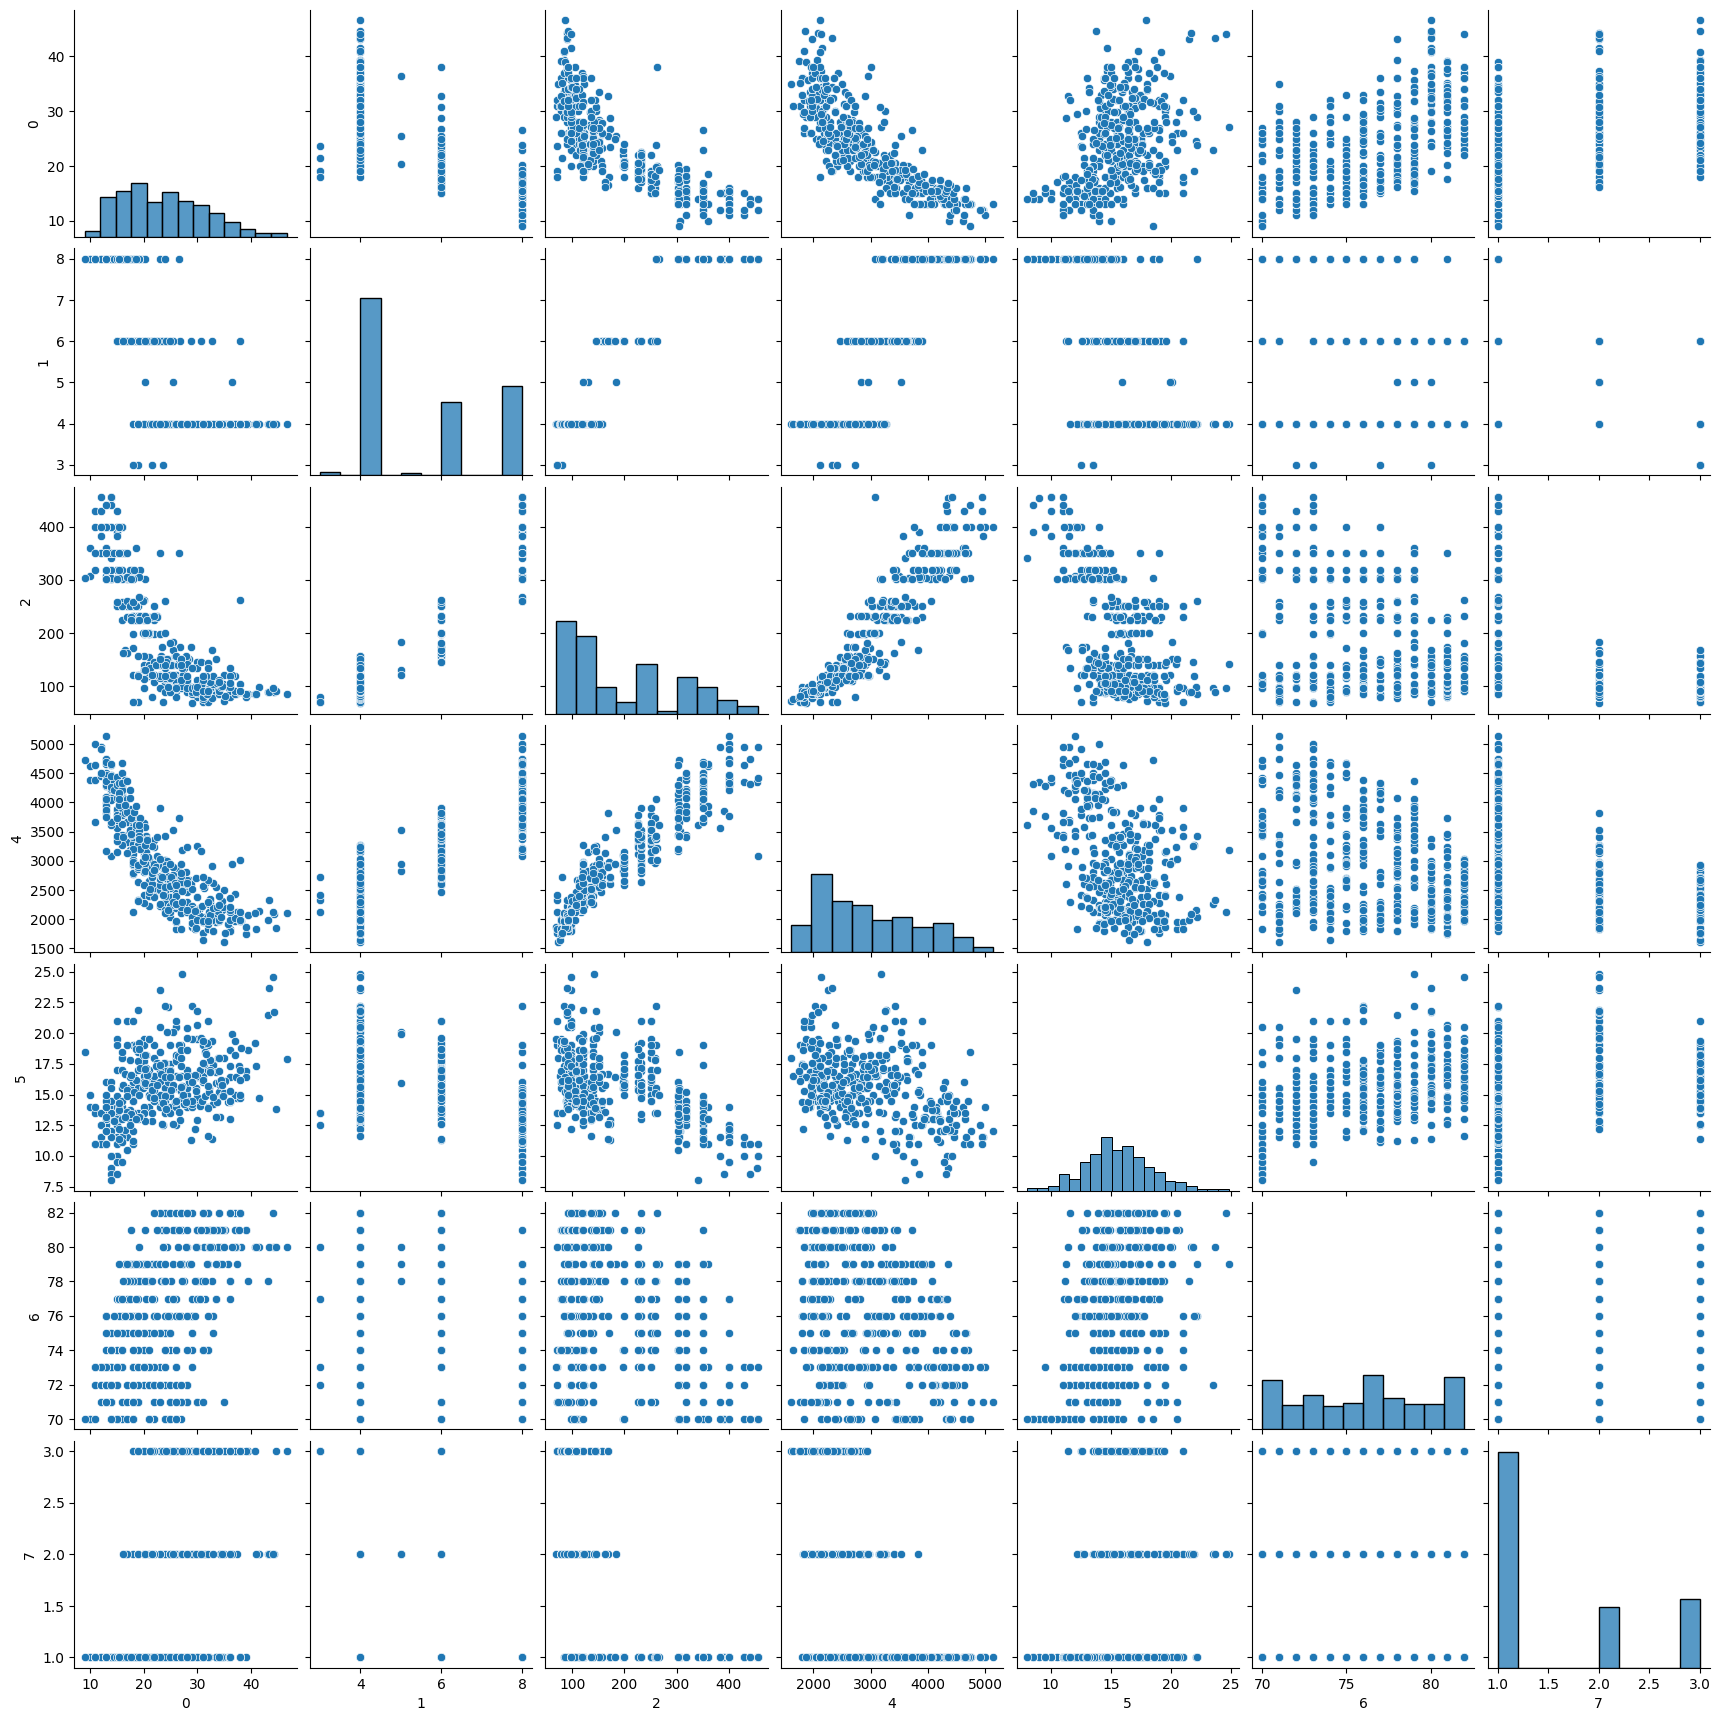

In [4]:
import seaborn as sns
sns.pairplot(data=df)

In [17]:
y = df[0]
X = df[[4]].to_numpy()

In [18]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=100)
len(x_train),  len(y_train)

(318, 318)

In [19]:
# 데이터를 다항형태로 변형
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

In [21]:
x_poly_train.ndim, x_poly_train.shape, x_poly_test.ndim, x_poly_test.shape

(2, (318, 3), 2, (80, 3))

In [44]:
# 모델 선정
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_test_predict = lr.predict(x_test)
lr.score(x_test,y_test)

0.7373187848306613

In [45]:
y_test_predict

array([28.39685991, 33.92074192, 23.46974078, 23.96704317, 26.06336405,
       21.2433562 , 22.38332631, 25.29828344, 15.23747341, 24.07415446,
       23.43148675, 28.05257363, 21.52643603, 29.77400501, 31.30416623,
       18.32839907, 16.11731611, 23.69161415, 27.96841477, 24.06650365,
       31.34242026, 25.45129956, 28.93241634, 23.38558191, 16.88239672,
       11.8481663 , 24.72447298, 15.06915567, 26.70603176, 13.27121624,
       30.46257756, 29.96527516, 16.42334835, 28.06022444, 26.79019063,
       21.70240457, 13.9750904 , 26.33114226, 13.17175576, 17.02776203,
       10.05787767,  9.95076639, 17.33379428, 30.42432353, 16.44630077,
       26.10926888, 14.57950408, 18.00706522, 19.90446513, 28.28209782,
       25.77263341, 27.67003333, 31.11289608, 21.28926104, 18.56557406,
       20.25640221, 24.15066252, 23.04129563,  8.03041405, 30.00352919,
       31.03638802, 22.77351742, 26.58361886, 21.18214975, 29.85051307,
       17.30319105, 20.09573528, 18.47376439, 28.93241634, 14.62

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_poly_train,y_train)
y_poly_train_predict = lr.predict(x_poly_test)
lr.score(x_poly_test,y_test)

0.7623113617762494

In [47]:
y_poly_train_predict

array([28.31475726, 36.83951061, 22.2144313 , 22.7658268 , 25.24891903,
       19.9229283 , 21.06008045, 24.31294327, 15.1849606 , 22.88647913,
       22.17261443, 27.84242442, 20.198226  , 30.27330572, 32.57935956,
       17.36028816, 15.74737438, 22.45865426, 27.72801807, 22.87783889,
       32.6387627 , 24.49740392, 29.0632552 , 22.12254699, 16.27317472,
       13.44091534, 23.63339292, 15.08251952, 26.06155397, 14.09148145,
       31.29411021, 30.55408529, 15.95359276, 27.85284551, 26.16975642,
       20.37171551, 14.45697786, 25.58458588, 14.04216809, 16.37694098,
       12.79042805, 12.75744387, 16.59942965, 31.2366725 , 15.96927961,
       25.30616454, 14.79391579, 17.10815563, 18.68425085, 28.1565439 ,
       24.88922169, 27.32572821, 32.28362567, 19.96725328, 17.55025359,
       18.99970448, 22.97306954, 21.75096349, 12.27976319, 30.61049757,
       32.16593029, 21.46673948, 25.9049069 , 19.86401973, 30.38536119,
       16.57693468, 18.85479578, 17.47632892, 29.0632552 , 14.82

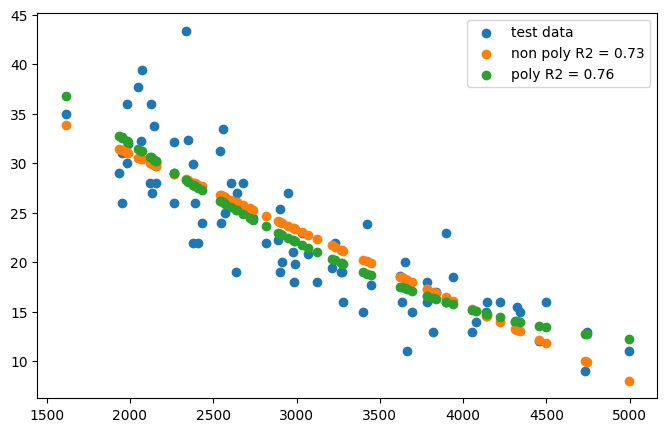

In [48]:
# 시각화를 통해 비교
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x = x_test,y=y_test,label='test data')
plt.scatter(x = x_test,y=y_test_predict,label='non poly R2 = 0.73')
plt.scatter(x = x_test,y=y_poly_train_predict,label='poly R2 = 0.76')
plt.legend()
plt.show()

In [50]:

result_df = pd.DataFrame(data={
    'y_test':y_test,
    'y_test_predict':y_test_predict,
    'y_poly_train_predict':y_poly_train_predict
})
result_df.head()

,y_test,y_test_predict,y_poly_train_predict
326,43.4,28.396860,28.314757
54,35.0,33.920742,36.839511
78,21.0,23.469741,22.214431
169,20.0,23.967043,22.765827
368,27.0,26.063364,25.248919


In [59]:
result_df['squared_error'] = (result_df.y_test - result_df.y_test_predict)**2
result_df['poly_squared_error'] = (result_df.y_test - result_df.y_poly_train_predict)**2
result_df.head()

,y_test,y_test_predict,y_poly_train_predict,squared_error,poly_squared_error
326,43.4,28.396860,28.314757,225.094213,227.564549
54,35.0,33.920742,36.839511,1.164798,3.383799
78,21.0,23.469741,22.214431,6.099620,1.474843
169,20.0,23.967043,22.765827,15.737432,7.649798
368,27.0,26.063364,25.248919,0.877287,3.066285


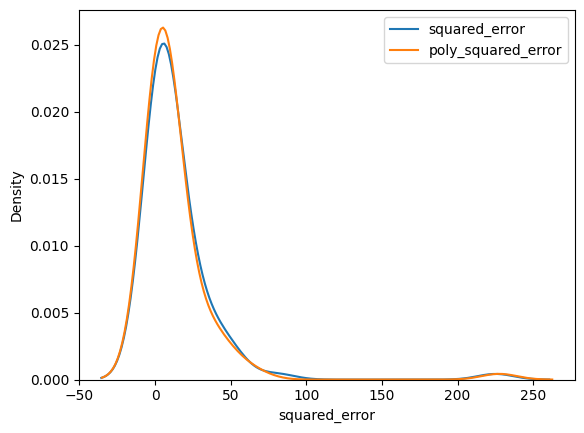

In [61]:
# 선형과 비선형일때 sns  regplot  kdeplot  이용해서 성능에대한 시각화  
sns.kdeplot(x='squared_error',  data=result_df,label='squared_error'); 
sns.kdeplot(x='poly_squared_error',  data=result_df,label='poly_squared_error'); 
plt.legend()
plt.show()